In [215]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
import numpy as np
import matplotlib.pyplot as plt

In [140]:
rb_df = pd.read_csv("RBData.csv", index_col=0)

In [141]:
rb_df.head()

,Name,Position,AV,First Year,Last Year,Y1,Y2,Y3,Y4,Y5,...,Y7,Y8,Y9,Y10,Y11,Y12,Y13,Y14,Y15,Y16
0,Emmitt Smith+,RB,169,1990,2004,206.5,309.1,377.8,307.0,364.5,...,282.3,194.8,267.7,256.6,193.2,148.7,152.4,62.3,173.2,NaN
1,Walter Payton+,RB,167,1975,1987,164.2,246.9,335.1,303.5,319.3,...,249.1,128.7,303.8,316.2,318.4,274.5,138.0,NaN,NaN,NaN
2,Marshall Faulk+,RB,164,1994,2005,304.4,295.3,199.5,247.5,368.7,...,455.9,423.7,289.0,221.8,182.4,108.3,NaN,NaN,NaN,NaN
3,LaDainian Tomlinson+,RB,158,2001,2011,279.3,386.2,439.0,338.6,354.2,...,362.9,277.6,180.4,216.2,132.9,NaN,NaN,NaN,NaN,NaN
4,Barry Sanders+,RB,149,1989,1998,283.2,310.4,328.5,246.7,186.0,...,309.8,260.0,352.8,239.0,NaN,NaN,NaN,NaN,NaN,NaN


In [142]:
rb_df = rb_df.fillna(0)

In [143]:
rb_df_subset = rb_df.drop(['Position', 'AV', 'First Year', 'Last Year'], axis=1)

In [144]:
rb_df_subset.head()

,Name,Y1,Y2,Y3,Y4,Y5,Y6,Y7,Y8,Y9,Y10,Y11,Y12,Y13,Y14,Y15,Y16
0,Emmitt Smith+,206.5,309.1,377.8,307.0,364.5,426.8,282.3,194.8,267.7,256.6,193.2,148.7,152.4,62.3,173.2,0.0
1,Walter Payton+,164.2,246.9,335.1,303.5,319.3,270.7,249.1,128.7,303.8,316.2,318.4,274.5,138.0,0.0,0.0,0.0
2,Marshall Faulk+,304.4,295.3,199.5,247.5,368.7,401.9,455.9,423.7,289.0,221.8,182.4,108.3,0.0,0.0,0.0,0.0
3,LaDainian Tomlinson+,279.3,386.2,439.0,338.6,354.2,474.3,362.9,277.6,180.4,216.2,132.9,0.0,0.0,0.0,0.0,0.0
4,Barry Sanders+,283.2,310.4,328.5,246.7,186.0,308.6,309.8,260.0,352.8,239.0,0.0,0.0,0.0,0.0,0.0,0.0


In [145]:
temp_df = rb_df_subset.drop('Name', axis=1)

mini = temp_df.min(numeric_only=True).min()
maxi = temp_df.max(numeric_only=True).max()
temp_df = (temp_df - mini) / (maxi - mini)

temp_df = temp_df.apply(np.sqrt)

rb_df_scaled = pd.concat([rb_df_subset.Name, temp_df], 1)

/var/folders/5d/x77440zn3c332t6t3c7wdsnm0000gn/T/ipykernel_28004/4072475507.py:9: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  rb_df_scaled = pd.concat([rb_df_subset.Name, temp_df], 1)


In [146]:
rb_df_scaled.head()

,Name,Y1,Y2,Y3,Y4,Y5,Y6,Y7,Y8,Y9,Y10,Y11,Y12,Y13,Y14,Y15,Y16
0,Emmitt Smith+,0.661090,0.807912,0.892828,0.805176,0.877030,0.948761,0.772259,0.642219,0.752125,0.736450,0.639595,0.561725,0.568606,0.365934,0.605837,0.05425
1,Walter Payton+,0.590016,0.722473,0.841058,0.800594,0.821075,0.756306,0.725667,0.522964,0.800987,0.817097,0.819922,0.761569,0.541333,0.054250,0.054250,0.05425
2,Marshall Faulk+,0.801774,0.789755,0.649865,0.723346,0.882050,0.920762,0.980469,0.945320,0.781325,0.684984,0.621593,0.480216,0.054250,0.054250,0.054250,0.05425
3,LaDainian Tomlinson+,0.768165,0.902662,0.962182,0.845421,0.864598,1.000000,0.875111,0.765836,0.618202,0.676337,0.531339,0.054250,0.054250,0.054250,0.054250,0.05425
4,Barry Sanders+,0.773483,0.809602,0.832769,0.722182,0.627651,0.807262,0.808822,0.741287,0.862895,0.710887,0.054250,0.054250,0.054250,0.054250,0.054250,0.05425


In [147]:
data = rb_df_scaled.drop("Name", axis=1)

In [162]:
for k in range(2,10):
    inertia_o = np.square((data - data.mean(axis=0))).sum().sum()
    # fit k-means
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=10).fit(data)
    scaled_inertia = kmeans.inertia_ / inertia_o + 0.02 * k
    print(k, scaled_inertia)

2 0.5607092839641212
3 0.46605815754216834
4 0.43044326069560634
5 0.4193464996195466
6 0.4162760563786223
7 0.41872292107902437
8 0.42367021534706983
9 0.4325717916677416


In [163]:
kmeans = KMeans(n_clusters=6, n_init=25).fit(data)

In [164]:
rb_df_scaled["Class"] = kmeans.labels_

In [165]:
rb_df_scaled

,Name,Y1,Y2,Y3,Y4,Y5,Y6,Y7,Y8,Y9,Y10,Y11,Y12,Y13,Y14,Y15,Y16,Class
0,Emmitt Smith+,0.661090,0.807912,0.892828,0.805176,0.877030,0.948761,0.772259,0.642219,0.752125,0.736450,0.639595,0.561725,0.568606,0.365934,0.605837,0.05425,5
1,Walter Payton+,0.590016,0.722473,0.841058,0.800594,0.821075,0.756306,0.725667,0.522964,0.800987,0.817097,0.819922,0.761569,0.541333,0.054250,0.054250,0.05425,5
2,Marshall Faulk+,0.801774,0.789755,0.649865,0.723346,0.882050,0.920762,0.980469,0.945320,0.781325,0.684984,0.621593,0.480216,0.054250,0.054250,0.054250,0.05425,5
3,LaDainian Tomlinson+,0.768165,0.902662,0.962182,0.845421,0.864598,1.000000,0.875111,0.765836,0.618202,0.676337,0.531339,0.054250,0.054250,0.054250,0.054250,0.05425,5
4,Barry Sanders+,0.773483,0.809602,0.832769,0.722182,0.627651,0.807262,0.808822,0.741287,0.862895,0.710887,0.054250,0.054250,0.054250,0.054250,0.054250,0.05425,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1779,Walter Holman,0.066442,0.054250,0.054250,0.054250,0.054250,0.054250,0.054250,0.054250,0.054250,0.054250,0.054250,0.054250,0.054250,0.054250,0.054250,0.05425,3
1780,Andy Hopkins,0.057995,0.054250,0.054250,0.054250,0.054250,0.054250,0.054250,0.054250,0.054250,0.054250,0.054250,0.054250,0.054250,0.054250,0.054250,0.05425,3
1781,Buddy Howell,0.054250,0.071030,0.138310,0.072494,0.054250,0.054250,0.054250,0.054250,0.054250,0.054250,0.054250,0.054250,0.054250,0.054250,0.054250,0.05425,3
1782,Kareem Huggins,0.054250,0.093963,0.054250,0.054250,0.054250,0.054250,0.054250,0.054250,0.054250,0.054250,0.054250,0.054250,0.054250,0.054250,0.054250,0.05425,3


In [175]:
centers = (kmeans.cluster_centers_**2) * (maxi-mini) + mini

In [176]:
centers = round(pd.DataFrame(centers), 1)

In [177]:
centers = centers.reset_index()

In [180]:
centers = centers.rename({"index": "Class",
                      0: "Y1",
                      1: "Y2",
                      2: "Y3",
                      3: "Y4",
                      4: "Y5",
                      5: "Y6",
                      6: "Y7",
                      7: "Y8",
                      8: "Y9",
                      9: "Y10",
                      10: "Y11",
                      11: "Y12",
                      12: "Y13",
                      13: "Y14",
                      14: "Y15",
                      15: "Y16"}, axis=1)

In [185]:
centers["Name"] = pd.Series(["Late Bloomers", "Early Bloomers", "Early Mid", "Scrubs", "Late Mid", "Studs"])

In [186]:
centers

,Class,Y1,Y2,Y3,Y4,Y5,Y6,Y7,Y8,Y9,Y10,Y11,Y12,Y13,Y14,Y15,Y16,Name
0,0,30.2,71.1,89.6,100.5,127.2,104.6,114.1,72.7,28.4,7.7,2.4,0.9,0.3,0.2,0.0,0.0,Late Bloomers
1,1,107.9,149.9,153.3,139.0,114.5,92.4,35.5,4.2,0.9,0.2,-0.0,0.0,-0.0,-0.0,0.0,0.0,Early Bloomers
2,2,55.6,61.8,19.6,4.1,1.0,0.3,0.2,0.1,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,Early Mid
3,3,12.1,5.0,2.5,1.5,0.9,0.6,0.3,0.2,0.1,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,Scrubs
4,4,40.1,61.1,72.4,65.3,28.8,8.6,2.5,1.0,0.4,0.2,0.1,0.1,0.1,0.1,0.0,0.0,Late Mid
5,5,133.1,173.4,199.3,209.3,215.4,225.9,187.1,164.9,138.9,88.7,48.0,21.1,8.1,3.4,1.6,0.7,Studs


In [191]:
rb_df_unscaled = round((data**2) * (maxi-mini) + mini, 1)
rb_df_unscaled = pd.concat([rb_df_scaled.Name, rb_df_unscaled], axis=1)
rb_df_unscaled["Class"] = kmeans.labels_
rb_df_unscaled

,Name,Y1,Y2,Y3,Y4,Y5,Y6,Y7,Y8,Y9,Y10,Y11,Y12,Y13,Y14,Y15,Y16,Class
0,Emmitt Smith+,206.5,309.1,377.8,307.0,364.5,426.8,282.3,194.8,267.7,256.6,193.2,148.7,152.4,62.3,173.2,0.0,5
1,Walter Payton+,164.2,246.9,335.1,303.5,319.3,270.7,249.1,128.7,303.8,316.2,318.4,274.5,138.0,0.0,0.0,0.0,5
2,Marshall Faulk+,304.4,295.3,199.5,247.5,368.7,401.9,455.9,423.7,289.0,221.8,182.4,108.3,0.0,0.0,0.0,0.0,5
3,LaDainian Tomlinson+,279.3,386.2,439.0,338.6,354.2,474.3,362.9,277.6,180.4,216.2,132.9,0.0,0.0,0.0,0.0,0.0,5
4,Barry Sanders+,283.2,310.4,328.5,246.7,186.0,308.6,309.8,260.0,352.8,239.0,0.0,0.0,0.0,0.0,0.0,0.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1779,Walter Holman,0.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
1780,Andy Hopkins,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
1781,Buddy Howell,0.0,1.0,7.7,1.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
1782,Kareem Huggins,0.0,2.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3


In [192]:
rb_df_final = pd.concat([rb_df_unscaled, centers], axis=0)

In [194]:
rb_df_final.to_csv("RBData_Class.csv")

In [198]:
rb_df_final["Class"] = rb_df_final["Class"].astype("object")

rb_df_final["Class"].describe()

count     1790
unique       6
top          3
freq       760
Name: Class, dtype: int64

In [199]:
rb_df_final["Class"].value_counts()

3    760
4    324
2    304
1    160
0    159
5     83
Name: Class, dtype: int64

In [204]:
plot_data = rb_df_final.drop("Name", 1)

/var/folders/5d/x77440zn3c332t6t3c7wdsnm0000gn/T/ipykernel_28004/3095490082.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  plot_data = rb_df_final.drop("Name", 1)


In [212]:
plot_data = plot_data.reset_index(drop=True)

In [239]:
color_dict = {0:'r', 1:'g', 2:'m', 3:'y', 4:'k', 5:'b'}
label_dict = {0:'Late Bloomers', 
              1:'Early Bloomers', 
              2:'Early Mid', 
              3:'Scrubs', 
              4:'Late Mid', 
              5:'Studs'}

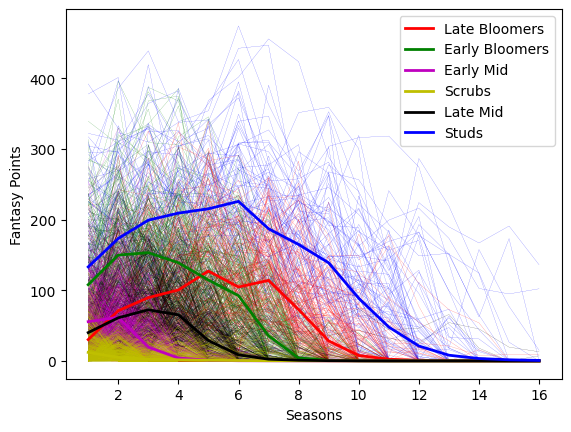

In [241]:
for i in range(len(plot_data) - 6):
    color = color_dict[plot_data.Class[i]]
    x = range(1, 17)
    y = plot_data.drop("Class", axis=1).loc[i]
    plt.plot(x, y, linewidth=.1, c=color)
for i in range(len(plot_data) - 6, len(plot_data)):
    color = color_dict[plot_data.Class[i]]
    lab = label_dict[plot_data.Class[i]]
    x = range(1, 17)
    y = plot_data.drop("Class", axis=1).loc[i]
    plt.plot(x, y, linewidth=2, c=color, label=lab)
plt.xlabel("Seasons")
plt.ylabel("Fantasy Points")
plt.legend()